In [62]:
import keras

In [63]:
from keras.datasets import mnist

In [64]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('mnist.npz')

In [65]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [66]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [97]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [98]:
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [99]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [100]:
import matplotlib.pyplot as plt

In [101]:
X_train[0].shape

(28, 28, 1)

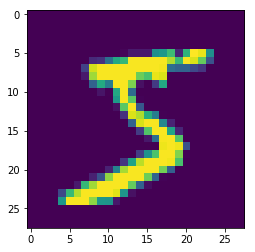

In [91]:
plt.imshow(X_train[0])

In [102]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [103]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.layers import MaxPool2D, AvgPool2D
from keras.layers import Conv2D
from keras.layers import Flatten, Activation

In [107]:
K.clear_session()

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

#model.evaluate(X_test, y_test_cat)

TypeError: Error converting shape to a TensorShape: int() argument must be a string, a bytes-like object or a number, not 'History'.

In [105]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [15]:
input=model.layers[0].input
output=model.layers[0].output

In [16]:
input.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [17]:
output.shape

TensorShape([Dimension(None), Dimension(26), Dimension(26), Dimension(32)])

In [30]:
input=model.layers[1].input
output=model.layers[1].output

In [31]:
input.shape

TensorShape([Dimension(None), Dimension(26), Dimension(26), Dimension(32)])

In [32]:
output.shape

TensorShape([Dimension(None), Dimension(13), Dimension(13), Dimension(32)])

In [41]:
input=model.layers[2].input
output=model.layers[3].output

In [42]:
output

<tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
